## K-Means

- **Q1** Se tiene que implementar un algoritmo K-Means siguiendo los pasos del pseudo código

In [46]:
# Añaden las librerias para el proyecto

# Import para el numpy
import numpy as np

# Librería para los Plots
import matplotlib.pyplot as plt

Implementación del algoritmo de k-Means

In [47]:
# Q1.- Esta es mi implementación del algoritmo K-Means

# Algoritmo K-Means
def kMeans(X, K, Iter_max):
    # Se inicializa el valor de los centroides cogiendo 3 valores aleatorios dentro del dataset 
    # que se proporciona.
    centroide = X[np.random.choice(np.arange(len(X)), K), :]
    # Se crea una matriz de del mismo orden del centroide para compararla y así poder detectar cuando
    # el sistema converge.
    centroide_old = np.zeros([K,len(X)])
    # Variables de control de convergencia
    converge = False
    iteracion = 0;
    # Se inicializa un bucle de convergencia. Se irá ejecutando hasta que se llegue al máximo número
    # de iteraciones o cuando el valor actual sea igual al valor anterior, lo que querrá decir que el 
    # valor es el mejor que se puede encontrar.
    while converge == False:
        # Realizo un código para asignar el centroide más cercano a cada punto
        ## Primero me recorro todo el dataset
        C_1 = [] # Valor para calcular los indices del centroide
        for data in X:
            # Se compara el punto con los valores del centroide para obtener el valor más cercano
            C_temp = []
            for cent in centroide:
                C_temp.append(np.dot(data-cent,data-cent))
            # Se asigna a la posición del centroide más cercano
            C_1.append(np.argmin(C_temp))
        C = np.array(C_1) # Valores transformados a array
        # Se recalculan los valores del centroide, realizando una media de todos los valores de 
        # cercanos a cada punto.
        centroide = [X[C == k].mean(axis = 0) for k in range(K)]
        # Se sale del bucle si las variables han convergido, es decir, si se ha llegado
        # al máximo de iteraciones o la variable encontrada es igual a la anterior
        if (iteracion == Iter_max) or (np.array_equal(centroide,centroide_old)):
            converge = True
        else:
            iteracion += 1
            centroide_old = centroide
    # La función devuelve le centroide, el array C con los indices y el número de iteraciones que
    # se han tenido que hacer para llegar al resultado óptimo, o el máximo si no se ha llegado hasta 
    # el final o no se ha llegado
    return np.array(centroide) , C, iteracion

- **Q2** Probar el algoritmo K-Means realizado con K = 3 y con las dos primeras dimensiones del dataset iris. para despues ir probandolo con 3 y 4.

In [48]:
# Se cargan los datos del archivo data.iris
data_Iris = np.array([map(float,x.split(',')[:-1]) for x in open('iris.data') if x.strip()])

In [49]:
# Se crean las variables para 2 y 3 columnas

## 2 columnas
data_Iris_2 = data_Iris[:,:2]

## 3 columnas
data_Iris_3 = data_Iris[:,:3]


Q2.- Se ha obtenido en  13  los siguientes valores de K-Means:
[[ 5.77358491  2.69245283]
 [ 5.006       3.418     ]
 [ 6.81276596  3.07446809]]


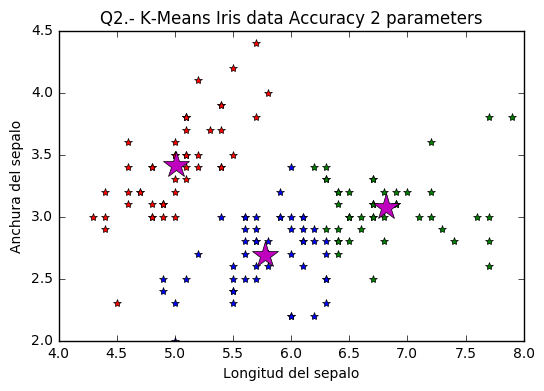

In [52]:
# Se inicializan las variables del bucle

## Se asignan el conjunto de datos con dos columnas
X = data_Iris_2

## Se inicializa la K a 3
K = 3

## Se definen el numero maximo de iteraciones como 100
iteraciones = 100

# Se ejecuta el algoritmo K-Means
centroides, C, iteraciones = kMeans(X, K, iteraciones)

# Se dibujan los resultados en un plot
plt.title("Q2.- K-Means Iris data Accuracy 2 parameters")
plt.xlabel("Longitud del sepalo")
plt.ylabel("Anchura del sepalo")

# Se agregan al plot los puntos de distintos colores, dependiendo del centroide al que
# han sido asignados
plt.plot(X[C == 0, 0], X[C == 0, 1], '*b',
         X[C == 1, 0], X[C == 1, 1], '*r',
         X[C == 2, 0], X[C == 2, 1], '*g')

# Se agregan las posiciones de los tres centroides
plt.plot(centroides[:,0],centroides[:,1],'*m',markersize=20)

# Se dibuja el plot
plt.draw()

# Resultado del Q2 para un dataset de 2 columnas
print 'Q2.- Se ha obtenido en ', iteraciones, ' los siguientes valores de K-Means:'
print centroides

In [ ]:
# 